In [1]:
import cv2 
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
from efficientnet.tfkeras import EfficientNetB0
from keras.models import load_model
import tensorflow as tf
import numpy as np
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator, DirectoryIterator 

%reload_ext autoreload
%autoreload 2

In [2]:
path = os.getcwd()
main_dir =os.path.dirname(path) + "\\"
test_dir = main_dir + "data\\test_image"

model_dir = main_dir + "models\\"
model_path = model_dir + "4class_chennai_inception_set2_hybrid.h5" # pre_post_hdd_model_16.h5

test_dir

'C:\\python_projects\\facebook_cv_proj\\data\\test_image'

In [3]:
test_datagen = ImageDataGenerator(rescale = 1.0/255.)
test_generator = test_datagen.flow_from_directory(test_dir, batch_size = 5, shuffle=False, class_mode = 'categorical', target_size = (224, 224))

Found 480 images belonging to 4 classes.



def predict_classname(class_names):
    predict_class=''
    if class_names==0:
        predict_class='HDD-Post-Destruction'
    elif class_names==1:
        predict_class='HDD-Pre-Destruction'
    elif class_names==2:
        predict_class='SSD-Post-Destruction'
    else:
        predict_class='SSD-Pre-Destruction'   
    return  predict_class 

In [4]:
print('loading model.......')
loaded_model = tf.keras.models.load_model(model_path) 

loading model.......


In [5]:
pred_probs = loaded_model.predict(test_generator)


In [6]:
max_probs = pred_probs.max(axis=1)
y_pred =  np.argmax(pred_probs, axis=1)
y_true = test_generator.classes
file_paths = test_generator.filepaths

for x,y,z,u,v in zip(pred_probs, max_probs, y_pred, y_true, file_paths):
    print(x,y,z,u)

[1.8789669e-02 9.8121029e-01 1.0364316e-08 8.7257810e-09] 0.9812103 1 0
[2.0724986e-02 9.7927505e-01 6.4971633e-09 5.3721889e-09] 0.97927505 1 0
[4.5620158e-01 5.4379845e-01 1.1473279e-08 1.6610468e-08] 0.54379845 1 0
[7.4139065e-01 2.5860903e-01 8.8517766e-08 2.3582169e-07] 0.74139065 0 0
[1.07482495e-02 9.89251673e-01 4.83603602e-09 5.50403945e-09] 0.9892517 1 0
[1.7441258e-02 9.8255873e-01 4.6460604e-09 2.5587317e-09] 0.9825587 1 0
[1.8922789e-02 9.8107713e-01 8.4791845e-09 3.7915546e-09] 0.98107713 1 0
[1.3334725e-04 9.9986660e-01 3.3645824e-09 5.9581629e-10] 0.9998666 1 0
[1.0009941e-02 9.8999000e-01 6.7071584e-09 7.6109412e-09] 0.98999 1 0
[1.1239872e-01 8.8760132e-01 1.8818348e-08 2.4478441e-08] 0.8876013 1 0
[1.9844009e-01 8.0155987e-01 5.0748813e-08 4.5549200e-08] 0.80155987 1 0
[6.5555680e-01 3.4444323e-01 2.2322917e-09 7.7432407e-09] 0.6555568 0 0
[8.8945884e-01 1.1054113e-01 3.2993860e-08 2.6654398e-08] 0.88945884 0 0
[4.7022179e-03 9.9529773e-01 1.7820765e-08 8.2540925e-09

In [7]:
data = zip(file_paths, pred_probs, max_probs, y_pred, y_true)

In [8]:
#cv2.destroyAllWindows()
os.chdir(main_dir)
df = pd.DataFrame(data, columns=['filename', 'result','max_probability','predict_class','actual_class'])
df.to_csv(main_dir + 'output//result_hdd.csv')
df

filename  \
0    C:\python_projects\facebook_cv_proj\data\test_...   
1    C:\python_projects\facebook_cv_proj\data\test_...   
2    C:\python_projects\facebook_cv_proj\data\test_...   
3    C:\python_projects\facebook_cv_proj\data\test_...   
4    C:\python_projects\facebook_cv_proj\data\test_...   
..                                                 ...   
475  C:\python_projects\facebook_cv_proj\data\test_...   
476  C:\python_projects\facebook_cv_proj\data\test_...   
477  C:\python_projects\facebook_cv_proj\data\test_...   
478  C:\python_projects\facebook_cv_proj\data\test_...   
479  C:\python_projects\facebook_cv_proj\data\test_...   

                                                result  max_probability  \
0    [0.01878967, 0.9812103, 1.0364316e-08, 8.72578...         0.981210   
1    [0.020724986, 0.97927505, 6.4971633e-09, 5.372...         0.979275   
2    [0.45620158, 0.54379845, 1.1473279e-08, 1.6610...         0.543798   
3    [0.74139065, 0.25860903, 8.8517766e-08, 2.3582...         0.741391   
4    [0.0107482495, 0.9892517, 4.836036e-09, 5.5040...         0.989252   
..                                                 ...              ...   
475  [1.9620835e-08, 2.2725404e-10, 1.561386e-05, 0...         0.999984   
476  [1.6285762e-08, 1.8942127e-10, 2.7126905e-06, ...         0.999997   
477  [2.981467e-08, 1.3575567e-10, 5.6378776e-05, 0...         0.999944   
478  [1.4227953e-07, 5.9141008e-09, 2.6312508e-05, ...         0.999974   
479  [1.4640869e-08, 1.4512905e-10, 2.4016934e-05, ...         0.999976   

     predict_class  actual_class  
0                1             0  
1                1             0  
2                1             0  
3                0             0  
4                1             0  
..             ...           ...  
475              3             3  
476              3             3  
477              3             3  
478              3             3  
479              3             3  

[480 rows x 5 columns]

In [9]:
len(df.loc[df.predict_class == df.actual_class])

377

In [10]:
len(df.loc[df.predict_class != df.actual_class])

103

In [11]:
from sklearn.metrics import confusion_matrix
#Get the confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print(cf_matrix)

[[ 17 103   0   0]
 [  0 120   0   0]
 [  0   0 120   0]
 [  0   0   0 120]]


In [12]:
cf_matrix.flatten()

array([ 17, 103,   0,   0,   0, 120,   0,   0,   0,   0, 120,   0,   0,
         0,   0, 120], dtype=int64)

In [15]:
class_names_dict = {'HDD-Post-Destruction':0, 'HDD-Pre-Destruction':1, 'SSD-Post-Destruction':2, 'SSD-Pre-Destruction':3}

class_names = class_names_dict.keys()#[‘True Neg’,’False Pos’,’False Neg’,’True Pos’]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value/np.sum(cf_matrix[0])) for value in cf_matrix.flatten()]
n_class = len(list(class_names))
type(cf_matrix)

numpy.ndarray

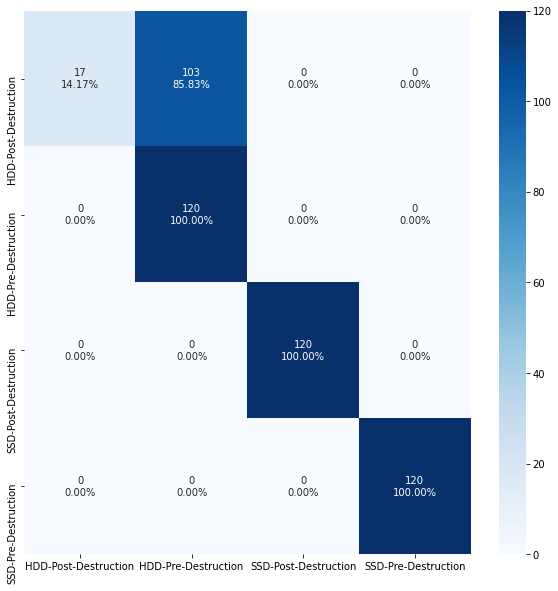

In [18]:
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(n_class,n_class)
plt.figure(figsize = (10,10))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', yticklabels=class_names, xticklabels=class_names)
plt.savefig(main_dir+"output//cf_matrix_hdd.png")

In [19]:
cf_matrix.shape, labels.shape

((4, 4), (4, 4))